In [4]:
import networkx as nx
import matplotlib.pyplot as plt

In [57]:
import numpy as np
import pandas as pd

In [219]:
g = nx.grid_2d_graph(4,4)

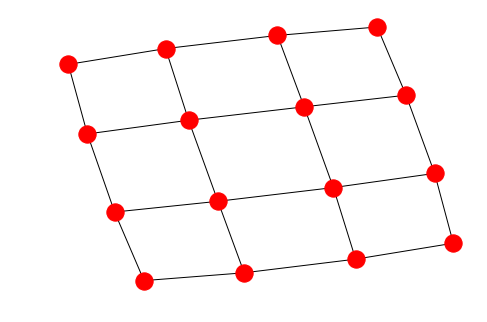

In [220]:
nx.draw(g)
plt.show()

## Weisfeiler-Lehman graph labeling

This is a node labeling function that map vertex to a color.  
* Initialy all vertex are labelled 1.  
* Then each vertex collect the concatenated labels of its neighbors in ascending order.  
* labels tuples (vertex label and neighbos string) are sorted in ascending order.  
* New colors are asigned to each vertex with the same color for identical strings.  


In [12]:
g.nodes()

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)))

In [16]:
def node_name(tpl):
    return str(tpl[0])+str(tpl[1])

In [221]:
mapping = {tpl:node_name(tpl) for tpl in g.nodes()}

In [222]:
G = nx.relabel_nodes(g, mapping)

In [47]:
# list of vertex with initial color of 1
colors = {x:[1,None] for x in G.nodes()}

In [50]:
# collect neighbors colors
''.join([str(colors[n][0]) for n in nx.neighbors(G,'00')])

'11'

In [74]:
def neighbors_colors(s):
    return ''.join(sorted([str(colors[n][0]) for n in nx.neighbors(G,s)]))

In [52]:
neighbors_colors('01')

'111'

In [53]:
# signature string
colors['01'][1] = neighbors_colors('01')

In [68]:
names = list(G.nodes())

In [120]:
colors = ['1']*len(names)

In [121]:
n_colors = [None]*len(names)

In [122]:
df = pd.DataFrame({'name':names, 'colors':colors, 'n_colors':n_colors}, dtype=str)

In [123]:
df

,colors,n_colors,name
0,1,None,00
1,1,None,01
2,1,None,02
3,1,None,03
4,1,None,10
5,1,None,11
6,1,None,12
7,1,None,13
8,1,None,20
9,1,None,21


In [124]:
df.colors.values

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1'], dtype=object)

In [125]:
[str(df[df.name == n].colors.values[0]) for n in nx.neighbors(G,'00')]

['1', '1']

In [230]:
def neighbors_colors(s):
    return ''.join(sorted([str(df[df.name == n].colors.values[0]) for n in nx.neighbors(G,s)]))

In [127]:
# signature update
df.n_colors = df.name.map(neighbors_colors)

In [135]:
df['signature'] = (df[['colors','n_colors']] + ',').sum(axis=1)

In [139]:
df.sort_values('signature', inplace=True)

In [142]:
# new colors
un_sig = df.signature.unique()

In [150]:
for i, sig in enumerate(un_sig):
    df.loc[df.signature == sig,'colors'] = str(i+1)

In [151]:
df

,colors,n_colors,name,signature
0,1,22,00,"1,11,"
3,1,22,03,"1,11,"
12,1,22,30,"1,11,"
15,1,22,33,"1,11,"
1,2,123,01,"1,111,"
2,2,123,02,"1,111,"
4,2,123,10,"1,111,"
7,2,123,13,"1,111,"
8,2,123,20,"1,111,"
11,2,123,23,"1,111,"


In [152]:
# signature update
df.n_colors = df.name.map(neighbors_colors)

In [153]:
df

,colors,n_colors,name,signature
0,1,22,00,"1,11,"
3,1,22,03,"1,11,"
12,1,22,30,"1,11,"
15,1,22,33,"1,11,"
1,2,123,01,"1,111,"
2,2,123,02,"1,111,"
4,2,123,10,"1,111,"
7,2,123,13,"1,111,"
8,2,123,20,"1,111,"
11,2,123,23,"1,111,"


In [154]:
df['signature'] = (df[['colors','n_colors']] + ',').sum(axis=1)

In [155]:
df

,colors,n_colors,name,signature
0,1,22,00,"1,22,"
3,1,22,03,"1,22,"
12,1,22,30,"1,22,"
15,1,22,33,"1,22,"
1,2,123,01,"2,123,"
2,2,123,02,"2,123,"
4,2,123,10,"2,123,"
7,2,123,13,"2,123,"
8,2,123,20,"2,123,"
11,2,123,23,"2,123,"


In [156]:
df.sort_values('signature', inplace=True)

In [157]:
# new colors
un_sig = df.signature.unique()

In [158]:
for i, sig in enumerate(un_sig):
    df.loc[df.signature == sig,'colors'] = str(i+1)

In [159]:
df

,colors,n_colors,name,signature
0,1,22,00,"1,22,"
3,1,22,03,"1,22,"
12,1,22,30,"1,22,"
15,1,22,33,"1,22,"
1,2,123,01,"2,123,"
2,2,123,02,"2,123,"
4,2,123,10,"2,123,"
7,2,123,13,"2,123,"
8,2,123,20,"2,123,"
11,2,123,23,"2,123,"


In [170]:
(colors == df.colors).all()

False

In [165]:
c = df.sort_values('name').colors.tolist()

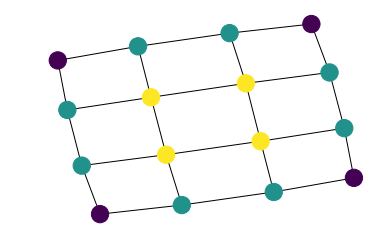

In [167]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_color=c)
nx.draw_networkx_edges(G,pos=pos)
plt.axis('off')
plt.show()


In [207]:
def WLgraphLab(G):
    names = list(G.nodes())
    colors = ['0']*len(names)
    n_colors = [None]*len(names)
    df = pd.DataFrame({'name':names, 'colors':['1']*len(names), 'n_colors':n_colors}, dtype=str)
    while True:
#         print(colors)
        # signature update
        df.n_colors = df.name.map(neighbors_colors)
        df['signature'] = (df[['colors','n_colors']] + ',').sum(axis=1)
        df.sort_values('signature', inplace=True)
        # new colors
        un_sig = df.signature.unique()
        for i, sig in enumerate(un_sig):
            df.loc[df.signature == sig,'colors'] = str(i+1)
        if (colors == df.sort_values('name').colors).all():
            break
        else:
            # keep old colors
#             print(df.sort_values('name').colors.tolist())
            colors = df.sort_values('name').colors.tolist()
    return colors

In [208]:
WLgraphLab(G)

['2',
 '1',
 '1',
 '2',
 '1',
 '3',
 '3',
 '1',
 '1',
 '3',
 '3',
 '1',
 '2',
 '1',
 '1',
 '2']

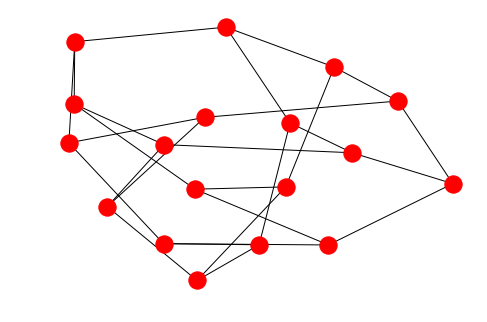

In [225]:
g = nx.pappus_graph()
nx.draw(g)
plt.show()

In [226]:
mapping = {n:str(n) for n in g.nodes()}
G = nx.relabel_nodes(g, mapping)

In [227]:
c = WLgraphLab(G)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [228]:
neighbors_colors('0')

IndexError: index 0 is out of bounds for axis 0 with size 0